In [286]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 数据生成

In [287]:
def generate_data(N,**kwargs):
    dicts=kwargs
    types=dicts['types']
    if types == 'Gaussian':
        mu=dicts['mu']
        sigma=dicts['sigma']
        return np.random.normal(mu,sigma,size=N)
    elif types == 'exponential':
        scale=dicts['scale']
        return np.random.exponential(scale=scale,size=N)
    elif types == 'uniform':
        a=dicts['a']
        b=dicts['b']
        return np.random.uniform(low=a,high=b,size=N)
    else:
        return None

## 高斯分布

In [288]:
N=2500
data_gassuain=generate_data(N,types='Gaussian',mu=100,sigma=25)
# data_gassuain=np.sort(data_gassuain)

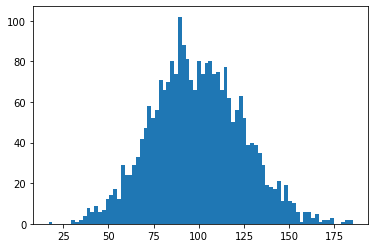

In [289]:
_,_,_=plt.hist(data_gassuain,bins=80)

# HDFS数据块划分

In [290]:
# tmp1=np.array(np.split(np.arange(100),10))
# # for i in range(tmp1.shape[0]):
# #     np.random.shuffle(tmp1[i])
# tmp_list=[np.split(tmp2,2) for tmp2 in tmp1]
# tmp_list
# tmp1

In [291]:
'''HDFS数据块按顺序划分'''
K=50# 100个HDFS数据块
M=50
# 按顺序切成K份
HDFS=np.array(np.split(data_gassuain,K))
for i in range(HDFS.shape[0]):
    np.random.shuffle(HDFS[i])
HDFS_list=[np.split(D_k,M) for D_k in HDFS]
print(HDFS.shape)

(50, 50)


# RSP数据块划分

In [292]:
# tt1=[[D_K[m] for D_K in tmp_list] for m in range(2)]
# tt1
# for idx,RSP_ in enumerate(tt1):
#     tmp_RSP=RSP_[0]
#     for i in range(1,len(RSP_)):
#         tmp_RSP=np.hstack((tmp_RSP,RSP_[i]))
#     tt1[idx]=tmp_RSP
# tt1=np.array(tt1)
# tt1

In [293]:
RSP=[[D_K[m] for D_K in HDFS_list] for m in range(M)]
for idx,RSP_ in enumerate(RSP):
    tmp_RSP=RSP_[0]
    for i in range(1,len(RSP_)):
        tmp_RSP=np.hstack((tmp_RSP,RSP_[i]))
    RSP[idx]=tmp_RSP
RSP=np.array(RSP)
print(RSP.shape)

(50, 50)


In [294]:
print(HDFS[0][:].shape)
print(RSP[0][:].shape)

(50,)
(50,)


In [295]:
np.save('HDFS.npy',HDFS)
np.save('RSP.npy',RSP)